In [1]:
!pip install chardet

  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 8.3 MB/s eta 0:00:00


In [2]:
from chardet import detect
with open(file='/kaggle/input/shoppersentiments/TeePublic_review.csv', mode='rb') as input_fp:
    data = input_fp.read()
print(len(data))
encoding=detect(byte_str=data[:1000000])['encoding']
print(encoding)

59912490
ISO-8859-1


In [3]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/shoppersentiments/TeePublic_review.csv', encoding=encoding)
df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [4]:
from plotly.express import pie
pie(data_frame=df['review-label'].value_counts().to_frame().reset_index(), names='review-label', values='count')

Three quarters of our reviews are positive.

In [5]:
df.shape, df.nunique()

((278100, 10),
 reviewer_id       278099
 store_location       141
 latitude             140
 longitude            140
 date                   6
 month                 12
 year                  31
 title             193993
 review            246427
 review-label           5
 dtype: int64)

In [6]:
from plotly.express import histogram
histogram(data_frame=df, x='date', color='review-label')

We have unequal numbers of reviews from different years, but not a lot of apparent change in the ratings over time.

In [7]:
review_df = df[['review']].copy().drop_duplicates(ignore_index=True).dropna()
review_df.shape

(246427, 1)

(-0.5, 1199.5, 1199.5, -0.5)

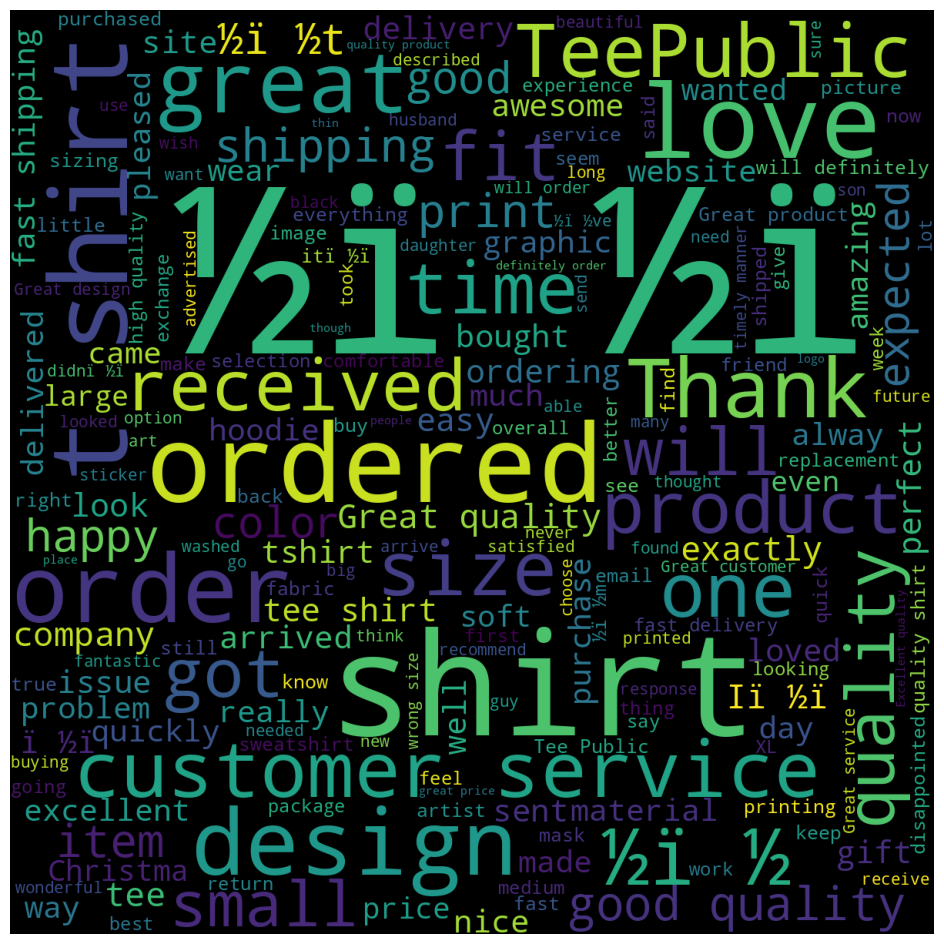

In [8]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
from wordcloud import STOPWORDS

FRACTION = 0.1
subplots(figsize=(12, 12))
text = ' '.join(review_df.sample(frac=FRACTION, random_state=2023)['review'].values.tolist())
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=STOPWORDS,).generate(text=text), )
axis('off')

Not surprisingly almost all of the reviews are about t-shirts.